# Ch 1 Figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Full environment names
envs = {"YPDKCL2M":"YPD KCL 2 M", "YPGALACTOSE":"YP Galactose 2%", 
"YPD40":"YPD 40ºC", "YPDCHX05":"YPD Cycloheximide 0.5 µg/ml", 
"YPDLICL250MM":"YPD LiCl 250 mM", "YPGLYCEROL":"YP Glycerol 2%", 
"YPD42":"YPD 42ºC", "YPDCHX1":"YPD Cycloheximide 1 µg/ml", "YPD14":"YPD 14ºC",
"YPDMV":"YPD Methylviologen 20 mM", "YPRIBOSE":"YP Ribose 2%", 
"YPD6AU":"YPD 6-Azauracile 600 µg/ml", "YPDCUSO410MM":"YPD CuSO4 10 mM", 
"YPDNACL15M":"YPD NaCl 1.5 M", "YPSORBITOL":"YP Sorbitol 2%", 
"YPDANISO10":"YPD Anisomycin 10 µg/ml", "YPDNACL1M":"YPD NaCl 1 M", 
"YPXYLOSE":"YP Xylose 2%", "YPDANISO20":"YPD Anisomycin 20 µg/ml", 
"YPDETOH":"YPD Ethanol 15%", "YPDSDS":"YPD SDS 0.2%", "YPDDMSO":"YPD DMSO 6%",
"YPDSODIUMMETAARSENITE":"YPD Sodium metaarsenite 2.5 mM", 
"YPDNYSTATIN":"YPD Nystatin 10 µg/ml", "YPDFORMAMIDE5":"YPD Formamide 5%",
"YPDFLUCONAZOLE":"YPD Fluconazole 20 µg/ml", "YPACETATE":"YP Acetate 2%", 
"YPDCAFEIN40":"YPD Caffeine 40 mM", "YPDHU":"YPD Hydroxyurea 30 mg/ml", 
"YPETHANOL":"YP Ethanol 2%", "YPDCAFEIN50":"YPD Caffeine 50 mM",  
"YPDANISO50":"YPD Anisomycin 50 µg/ml", "YPDBENOMYL200":"YPD Benomyl 200 µg/ml",
"YPDFORMAMIDE4":"YPD Formamide 4%", "YPDBENOMYL500":"YPD Benomyl 500 µg/ml"}

# Random forest models after feature selection for each environment
feats = {"YPACETATE":16, "YPD6AU":1024, "YPD14":256, "YPD40":1024, "YPD42":512,
"YPDANISO10":128, "YPDANISO20":1024, "YPDANISO50":256, "YPDBENOMYL200":512,
"YPDBENOMYL500":1024, "YPDCAFEIN40":512, "YPDCAFEIN50":1024, "YPDCHX1":512, 
"YPDCHX05":1024, "YPDCUSO410MM":1024, "YPDDMSO":256, "YPDETOH":32, 
"YPDFLUCONAZOLE":256, "YPDFORMAMIDE4":256, "YPDFORMAMIDE5":128, "YPDHU":128,
"YPDKCL2M":256, "YPDLICL250MM":128, "YPDMV":256, "YPDNACL1M":1024,
"YPDNACL15M":512, "YPDNYSTATIN":16, "YPDSDS":1024, "YPETHANOL":1024,
"YPGALACTOSE":128, "YPGLYCEROL":32, "YPRIBOSE":128, "YPSORBITOL":256,
"YPXYLOSE":256, "YPDSODIUMMETAARSENITE": 256}

### Top 20 genes in each environment

In [3]:
# Random forest  feature (snps) importance score files
top = pd.DataFrame(columns=["snp"]) # df to hold top 20 snps in each env
scratch = "/mnt/gs21/scratch/seguraab/yeast_project/yeast_rf_results" # path
for key,value in feats.items(): # read in files
    file = pd.read_csv(f"{scratch}/{key}_exp_rf_{value}_imp", sep="\t")
    file.columns = ["snp", f"{key}"] # rename columns
    top = top.merge(file.iloc[:20,:], on="snp",  how="outer") # top 20 snps
top.shape

(578, 36)

##### Overlapping top snp features

In [4]:
# of the top 20 snps, how many are common to all envs
overlap = top.dropna(axis=0) # 0 snps

# how many are common in at least 2 to 5 environments
overlap2 = top.dropna(axis=0, thresh=3) # 91 snps, 2 envs
overlap3 = top.dropna(axis=0, thresh=4) # 17 snps, 3 envs
overlap4 = top.dropna(axis=0, thresh=5) # 5 snps, 4 envs
overlap5 = top.dropna(axis=0, thresh=6) # 1 snp, 5 envs
overlap.shape, overlap2.shape, overlap3.shape, overlap4.shape, overlap5.shape

((0, 36), (91, 36), (17, 36), (5, 36), (1, 36))

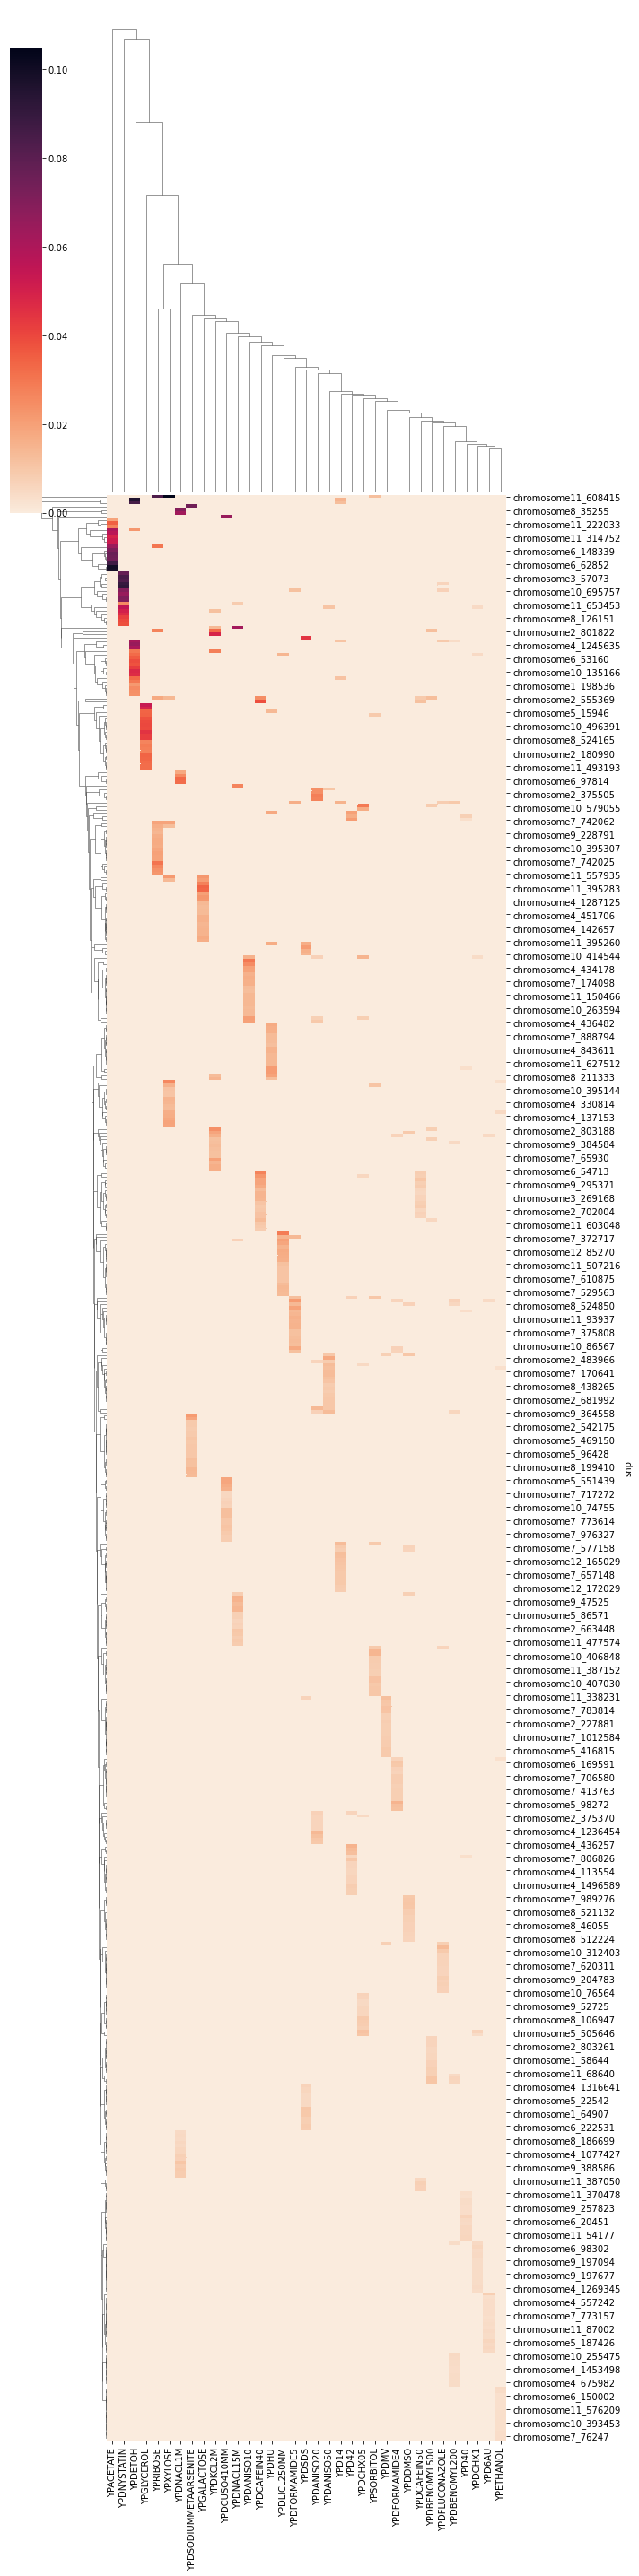

In [5]:
# Heatmap of the top 20 snps in each environment
top.fillna(0, inplace=True) # set missing values to zero
top.set_index("snp", inplace=True) # set snp as index
cmap = sns.cm.rocket_r
sns.clustermap(top, figsize=(10, 40), cmap=cmap)
plt.savefig("snps_top20_all_envs.pdf", format="pdf")

/mnt/home/seguraab/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


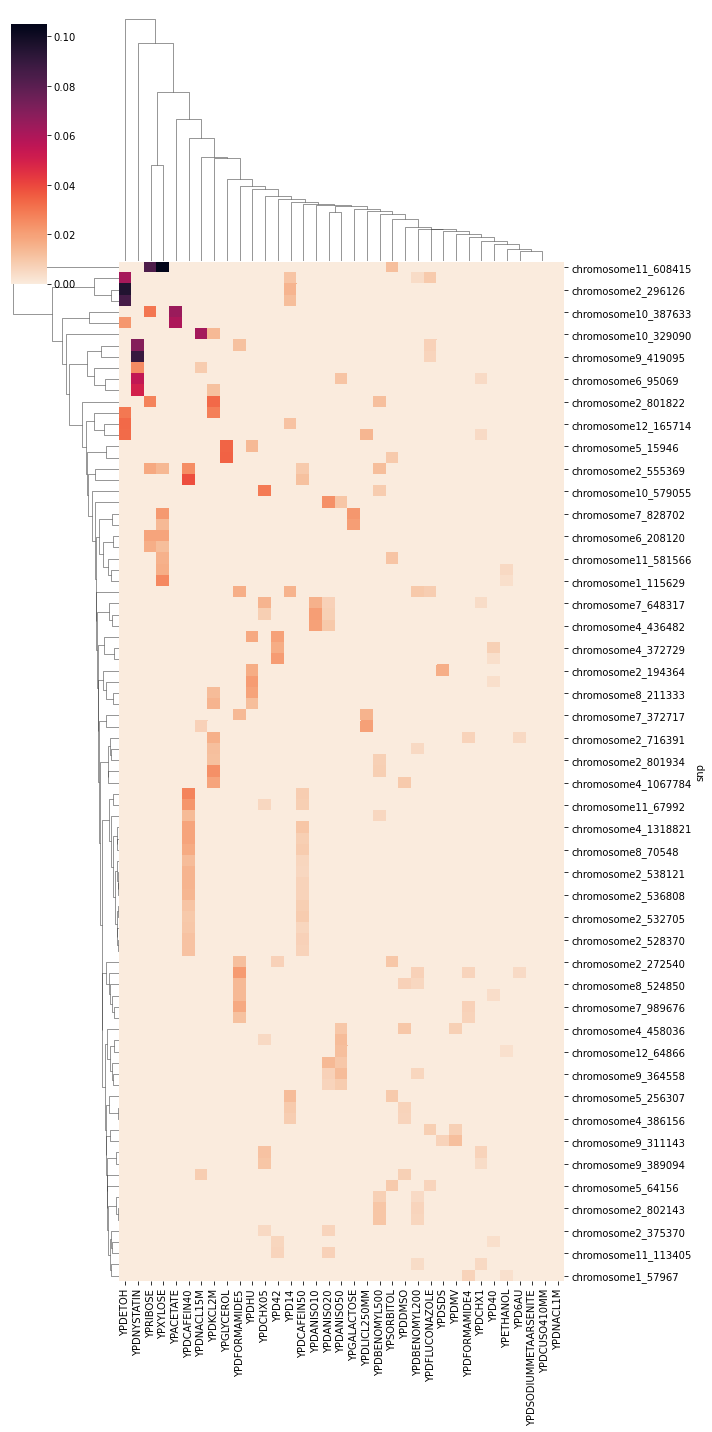

In [6]:
# Heatmap of a top 20 snp(s) overlapping in at least 2 environments
overlap2.fillna(0, inplace=True)
overlap2.set_index("snp", inplace=True)
sns.clustermap(overlap2, figsize=(10,20), cmap=cmap)
plt.savefig("snps_top20_overlap_2envs.pdf", format="pdf")

/mnt/home/seguraab/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


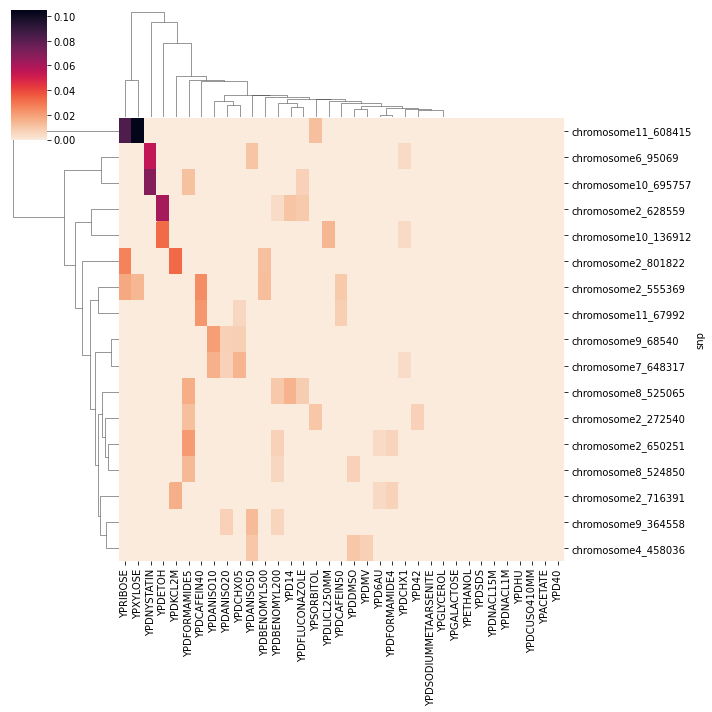

In [7]:
# Heatmap of a top 20 snp(s) overlapping in at least 3 environments
overlap3.fillna(0, inplace=True)
overlap3.set_index("snp", inplace=True)
sns.clustermap(overlap3, cmap=cmap)
plt.savefig("snps_top20_overlap_3envs.pdf", format="pdf")

/mnt/home/seguraab/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


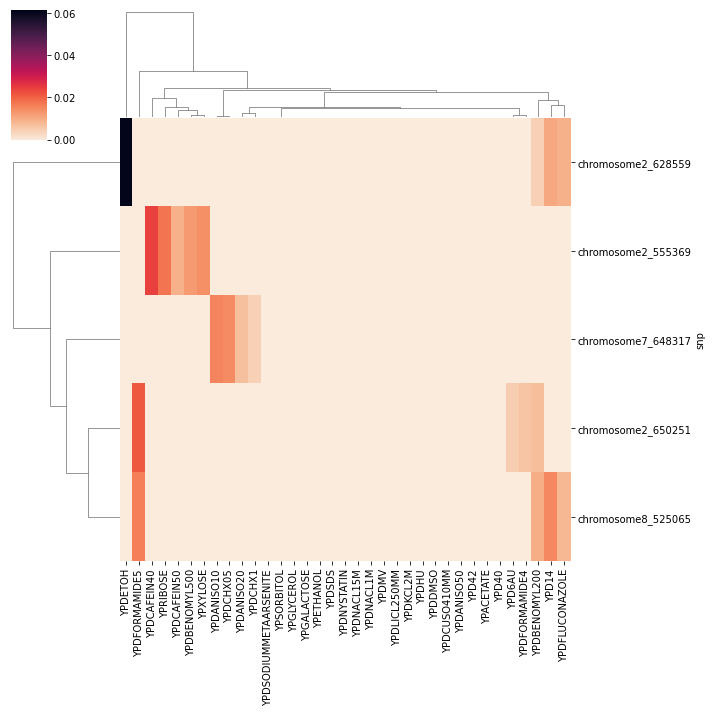

In [8]:
# Heatmap of a top 20 snp(s) overlapping in at least 4 environments
overlap4.fillna(0, inplace=True)
overlap4.set_index("snp", inplace=True)
sns.clustermap(overlap4, cmap=cmap)
plt.savefig("snps_top20_overlap_4envs.pdf", format="pdf")

/mnt/home/seguraab/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


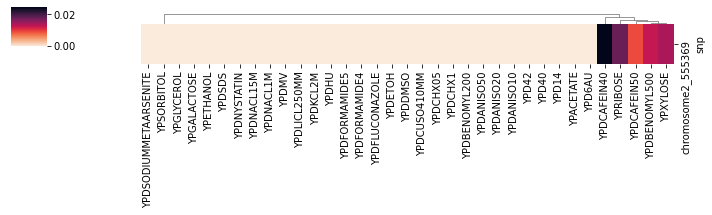

In [9]:
# Heatmap of a top 20 snp overlapping in at least 5 environments
overlap5.fillna(0, inplace=True)
overlap5.set_index("snp", inplace=True)
sns.clustermap( \
    overlap5, figsize=(10,3), row_cluster=False, row_linkage=False, cmap=cmap)
plt.savefig("snps_top20_overlap_5envs.pdf", format="pdf")

##### Map the top 20 snps to genes

In [10]:
# Read in snp-gene mapping file
data="/mnt/home/seguraab/Shiu_Lab/Project/Data/Peter_2018/"
genes = pd.read_csv(
    f'{data}/biallelic_snps_diploid_and_S288C_genes.txt', header=None)
genes.columns = ["snp", "chr", "pos", "gene"]

# merge to top
top_genes = top.merge(genes[["snp", "gene"]], on="snp")
top_genes.head()

,snp,YPACETATE,YPD6AU,YPD14,YPD40,YPD42,YPDANISO10,YPDANISO20,YPDANISO50,YPDBENOMYL200,...,YPDNYSTATIN,YPDSDS,YPETHANOL,YPGALACTOSE,YPGLYCEROL,YPRIBOSE,YPSORBITOL,YPXYLOSE,YPDSODIUMMETAARSENITE,gene
0,chromosome7_554853,0.099669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YGR033C
1,chromosome5_373736,0.098650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YER107C
2,chromosome6_62852,0.087184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,intergenic
3,chromosome8_379205,0.076659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YHL032C
4,chromosome4_212682,0.075364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,YDL248W


##### Overlapping top genes

In [11]:
top_genes.drop("snp", axis=1, inplace=True) # drop snp column
top_genes.replace(to_replace=0, value=np.nan, inplace=True) # set 0 to NAs

# of the genes in the top 20 snps, how many are common to all envs
overlap = top_genes.dropna(axis=0) # 0 genes, 35 envs

# how many are common in at least 2 to 5 environments
overlap2 = top_genes.dropna(axis=0, thresh=3) # 67 genes, 2 envs
overlap3 = top_genes.dropna(axis=0, thresh=4) # 13 genes, 3 envs
overlap4 = top_genes.dropna(axis=0, thresh=5) # 5 genes, 4 envs
overlap5 = top_genes.dropna(axis=0, thresh=6) # 1 gene, 5 envs
overlap.shape, overlap2.shape, overlap3.shape, overlap4.shape, overlap5.shape

((0, 36), (91, 36), (17, 36), (5, 36), (1, 36))

In [12]:
len(overlap2.gene.unique()), len(overlap3.gene.unique()), \
len(overlap4.gene.unique()), len(overlap5.gene.unique())

(67, 13, 5, 1)

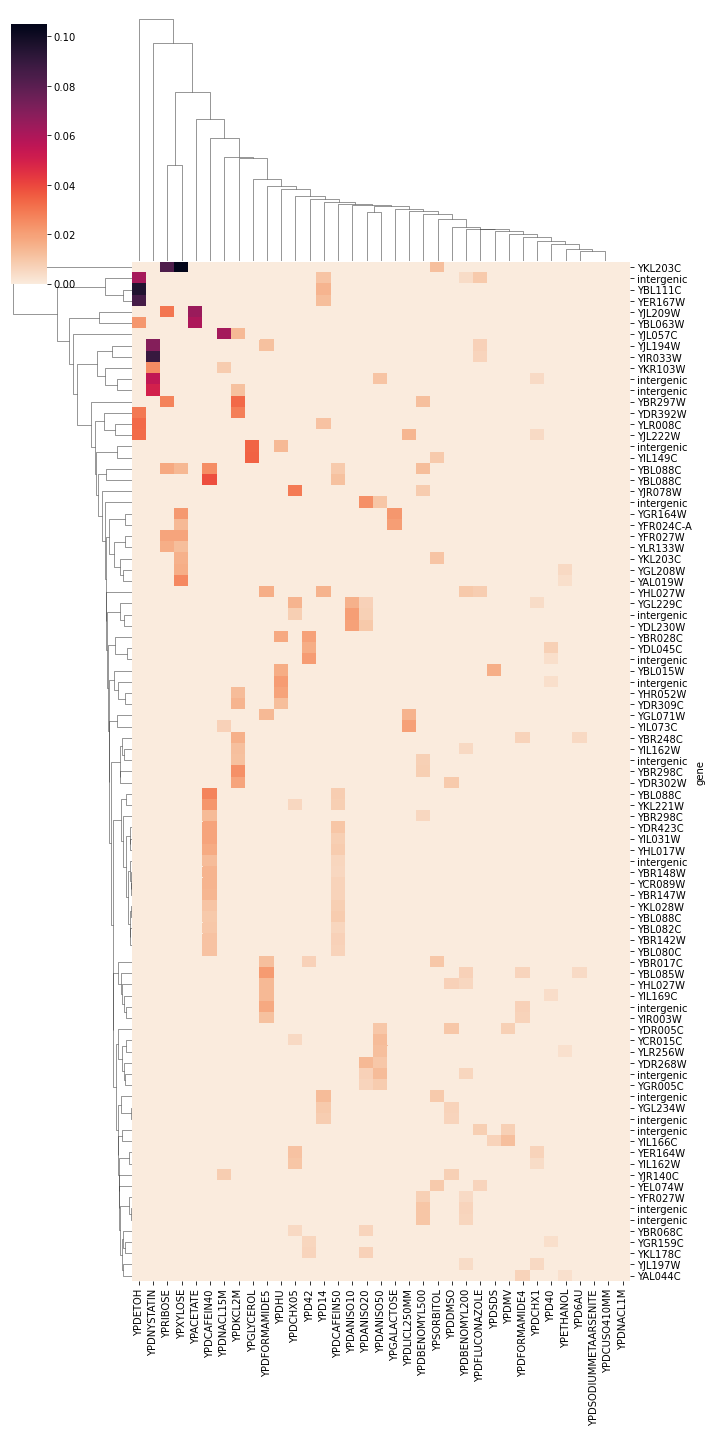

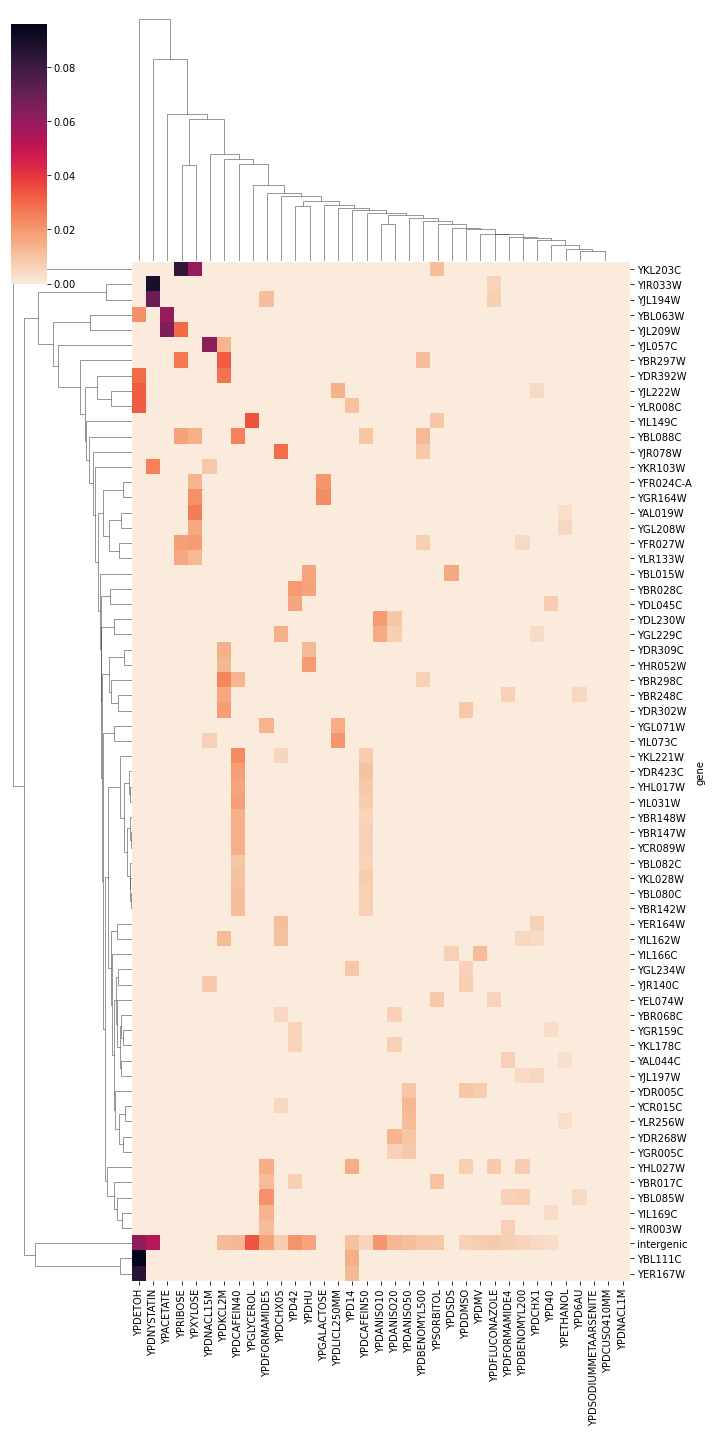

In [13]:
overlap2a = overlap2.fillna(0)
overlap2a.set_index("gene", inplace=True)
sns.clustermap(overlap2a, figsize=(10,20), cmap=cmap, linecolor="white", \
    yticklabels=overlap2a.index)
plt.savefig("genes_in_top20_overlap_2envs.pdf", format="pdf")

overlap2b = overlap2.groupby("gene", dropna=False).aggregate("mean")
overlap2b.fillna(0, inplace=True)
sns.clustermap(overlap2b, figsize=(10,20), cmap=cmap, linecolor="white")
plt.savefig("genes_in_top20_overlap_2envs_agg.pdf", format="pdf")

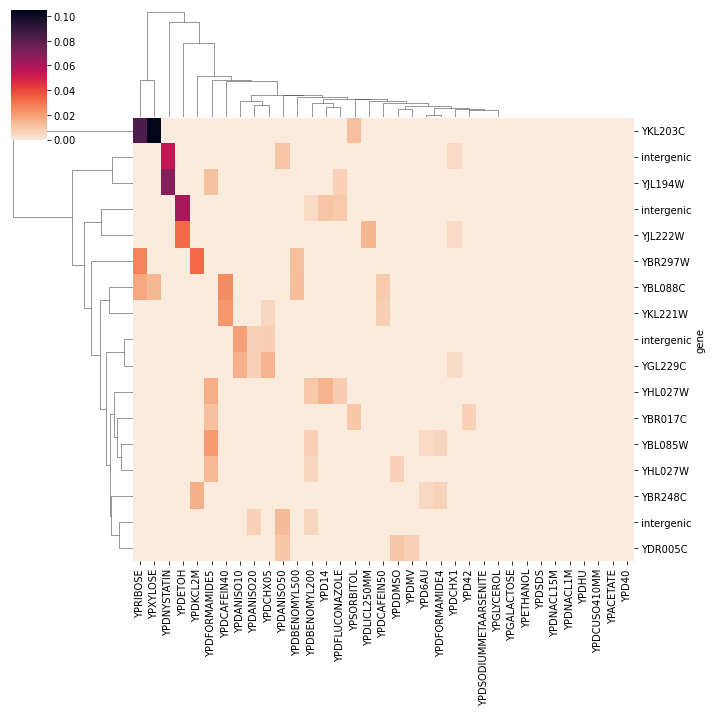

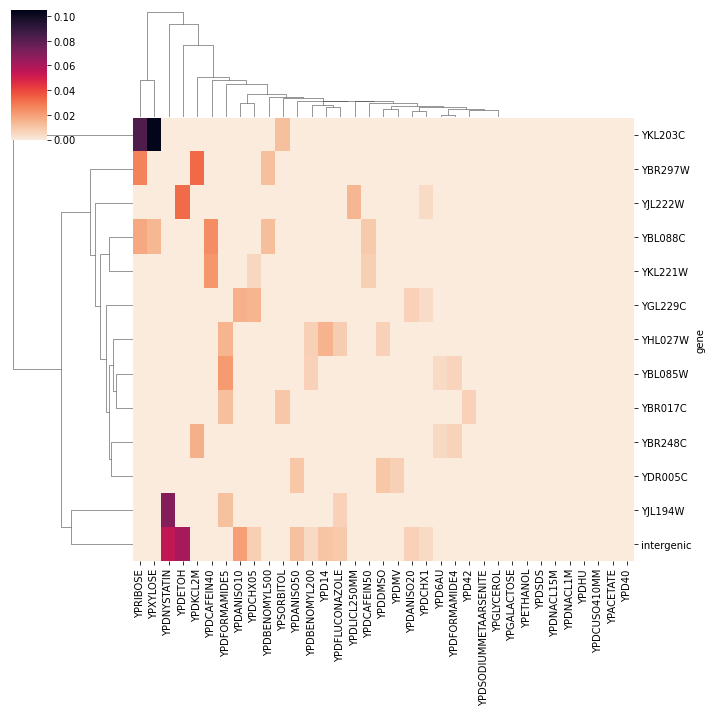

In [14]:
overlap3a = overlap3.fillna(0)
overlap3a.set_index("gene", inplace=True)
sns.clustermap( \
    overlap3a, cmap=cmap, linecolor="white", yticklabels=overlap3a.index)
plt.savefig("genes_in_top20_overlap_3envs.pdf", format="pdf")

overlap3b = overlap3.groupby("gene", dropna=False).aggregate("mean")
overlap3b.fillna(0, inplace=True)
sns.clustermap(overlap3b, cmap=cmap)
plt.savefig("genes_in_top20_overlap_3envs_agg.pdf", format="pdf")

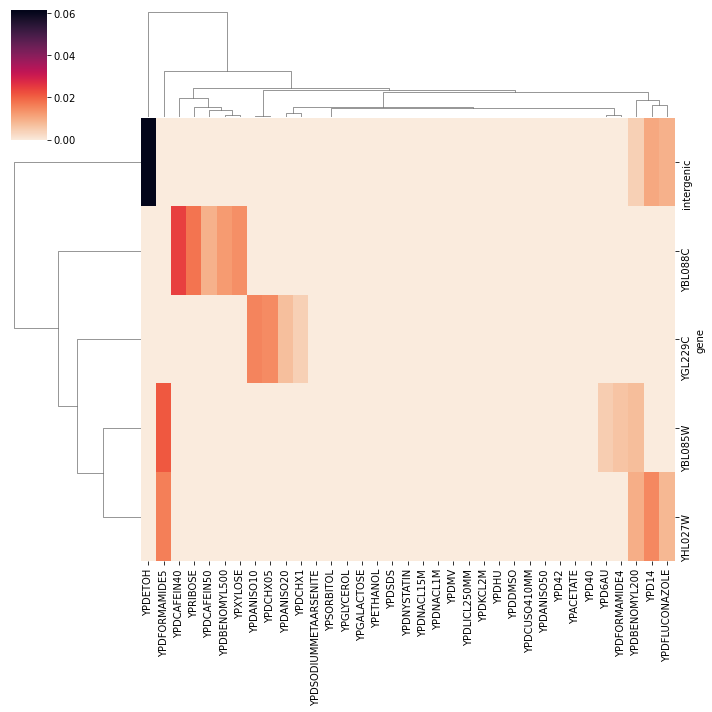

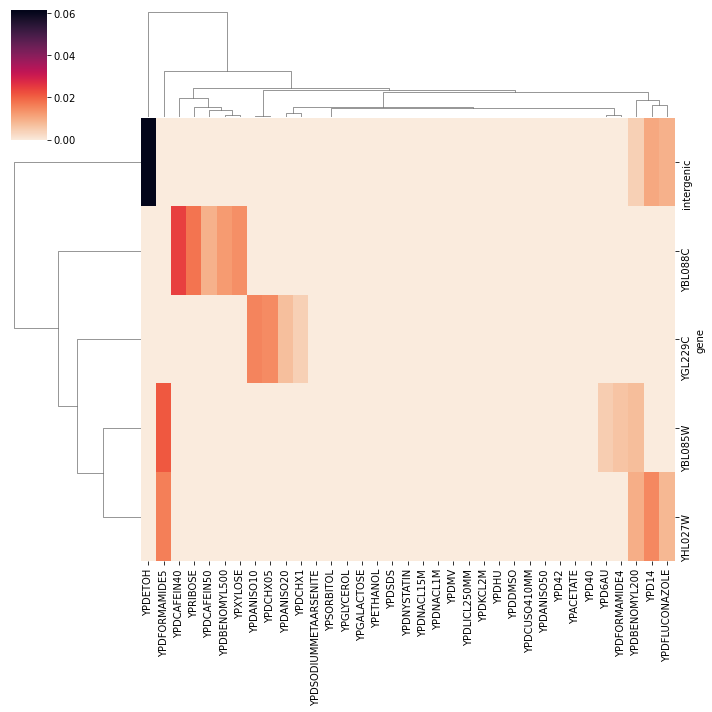

In [15]:
overlap4a = overlap4.fillna(0)
overlap4a.set_index("gene", inplace=True)
sns.clustermap( \
    overlap4a, cmap=cmap, linecolor="white", yticklabels=overlap4a.index)
plt.savefig("genes_in_top20_overlap_4envs.pdf", format="pdf")

overlap4b = overlap4.groupby("gene", dropna=False).aggregate("mean")
overlap4b.fillna(0, inplace=True)
sns.clustermap(overlap4b, cmap=cmap)
plt.savefig("genes_in_top20_overlap_4envs_agg.pdf", format="pdf")

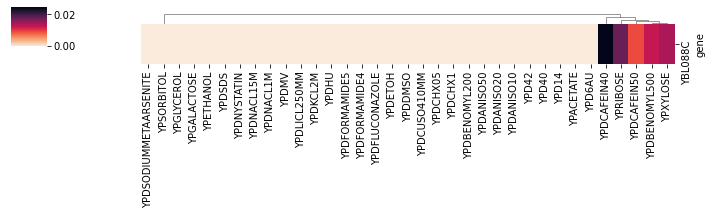

In [16]:
overlap5a = overlap5.fillna(0)
overlap5a.set_index("gene", inplace=True)
sns.clustermap(overlap5a, figsize=(10,3), row_cluster=False, \
    row_linkage=False, cmap=cmap, linecolor="white", yticklabels=overlap5a.index)
plt.savefig("genes_in_top20_overlap_5envs.pdf", format="pdf")